In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nlp
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anvpr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_nlp=pd.read_csv('datasets/reviews.csv')

In [3]:
df_nlp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,kxX2SOes4o-D3ZQBkiMRfA,1.0,2015-01-04 00:01:03,0.0,AqPFMleE6RsU23_auESxiA,5.0,"Wow! Yummy, different, delicious. Our favo...",1.0,_7bHUi9Uuf5__HHc_Q8guQ
1,e4Vwtrqf-wpJfwesgvdgxQ,1.0,2017-01-14 20:54:15,0.0,Sx8TMOWLNuJBWer-0pcmoA,4.0,Cute interior and owner (?) gave us tour of up...,1.0,bcjbaE6dDog4jkNY91ncLQ
2,LHSTtnW3YHCeUkRDGyJOyw,0.0,2015-08-07 02:29:16,0.0,_ZeMknuYdlQcUqng_Im3yg,5.0,Amazingly amazing wings and homemade bleu chee...,2.0,yfFzsLmaWF2d4Sr0UNbBgg
3,uMvVYRgGNXf5boolA9HXTw,0.0,2015-06-21 14:48:06,0.0,rGQRf8UafX7OTlMNN19I8A,5.0,My experience with Shalimar was nothing but wo...,2.0,1WHRWwQmZOZDAhp2Qyny4g
4,EQ-TZ2eeD_E0BHuvoaeG5Q,0.0,2015-08-19 14:31:45,0.0,l3Wk_mvAog6XANIuGQ9C7Q,4.0,"Locals recommended Milktooth, and it's an amaz...",0.0,ZbqSHbgCjzVAqaa7NKWn5A


In [4]:
df_nlp=df_nlp[['user_id','text','useful']]
df_nlp['useful']=df_nlp['useful'].astype(float)

In [5]:
# Majority of user reviews have useful factor 0.0, so I removed those to minimize data and also to get rid of any fake reviews 
df_nlp=df_nlp[df_nlp['useful']>0]
df_nlp['useful'].value_counts()

1.0      872667
2.0      356950
3.0      165711
4.0       84674
5.0       48877
          ...  
179.0         1
360.0         1
224.0         1
371.0         1
207.0         1
Name: useful, Length: 210, dtype: int64

In [6]:
#Condense the dataset to include reviewers with at least 100 reviews
#this makes our dataset to around 1000 unique users and minimum 100,000 data points(reviews)
df_nlp=df_nlp[['user_id','text']]
df=df_nlp.groupby('user_id').filter(lambda x: len(x) > 100).reset_index(drop=True)


In [7]:
df.rename(columns={'text': 'Review'}, errors="raise",inplace=True)

In [8]:
# Now remove stop words from the text(review) column, 
# it helps shorten the reviews and better visibilty for keywords used in the review
df['Review']=df['Review'].str.lower()
stop = stopwords.words('english')
print(stop) #print list of stopwords in english
df['Review_no_stopwords'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
df.head()

,user_id,Review,Review_no_stopwords
0,ZGjgfSvjQK886kiTzLwfLQ,"on a scale of one to things that are awesome, ...","scale one things awesome, place bomb. drawn pr..."
1,uAu772KpSkb-tPFgZmU-lA,i love weaver's way and really disagree with s...,love weaver's way really disagree content prev...
2,0Igx-a1wAstiBDerGxXk2A,say you decide that you need a new door...and ...,say decide need new door...and $35. go? green ...
3,hWDybu_KvYLSdEFzGrniTw,"as airport grab-and-go restaurants are, earl d...","airport grab-and-go restaurants are, earl dece..."
4,nnImk681KaRqUVHlSfZjGQ,ichicoro ane gets lots of things right and the...,ichicoro ane gets lots things right best part ...


In [10]:
#Remove punctuation from reviews
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df['Review_no_stopwords+punctuation']=df['Review_no_stopwords'].apply(remove_punctuations)
df.head()

,user_id,Review,Review_no_stopwords,Review_no_stopwords+punctuation
0,ZGjgfSvjQK886kiTzLwfLQ,"on a scale of one to things that are awesome, ...","scale one things awesome, place bomb. drawn pr...",scale one things awesome place bomb drawn prom...
1,uAu772KpSkb-tPFgZmU-lA,i love weaver's way and really disagree with s...,love weaver's way really disagree content prev...,love weavers way really disagree content previ...
2,0Igx-a1wAstiBDerGxXk2A,say you decide that you need a new door...and ...,say decide need new door...and $35. go? green ...,say decide need new doorand 35 go green projec...
3,hWDybu_KvYLSdEFzGrniTw,"as airport grab-and-go restaurants are, earl d...","airport grab-and-go restaurants are, earl dece...",airport grabandgo restaurants are earl decent ...
4,nnImk681KaRqUVHlSfZjGQ,ichicoro ane gets lots of things right and the...,ichicoro ane gets lots things right best part ...,ichicoro ane gets lots things right best part ...


In [11]:
#Lemmatization
#Lemmatization is the process of grouping together different inflected forms of the same word
# Study → Study
# Studying → Study
# Studies → Study
# Studied → Study
# Studier → Study
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
nltk.download('wordnet')
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['text_lemmatized'] = df['Review_no_stopwords+punctuation'].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anvpr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,user_id,Review,Review_no_stopwords,Review_no_stopwords+punctuation,text_lemmatized
0,ZGjgfSvjQK886kiTzLwfLQ,"on a scale of one to things that are awesome, ...","scale one things awesome, place bomb. drawn pr...",scale one things awesome place bomb drawn prom...,"[scale, one, thing, awesome, place, bomb, draw..."
1,uAu772KpSkb-tPFgZmU-lA,i love weaver's way and really disagree with s...,love weaver's way really disagree content prev...,love weavers way really disagree content previ...,"[love, weaver, way, really, disagree, content,..."
2,0Igx-a1wAstiBDerGxXk2A,say you decide that you need a new door...and ...,say decide need new door...and $35. go? green ...,say decide need new doorand 35 go green projec...,"[say, decide, need, new, doorand, 35, go, gree..."
3,hWDybu_KvYLSdEFzGrniTw,"as airport grab-and-go restaurants are, earl d...","airport grab-and-go restaurants are, earl dece...",airport grabandgo restaurants are earl decent ...,"[airport, grabandgo, restaurant, are, earl, de..."
4,nnImk681KaRqUVHlSfZjGQ,ichicoro ane gets lots of things right and the...,ichicoro ane gets lots things right best part ...,ichicoro ane gets lots things right best part ...,"[ichicoro, ane, get, lot, thing, right, best, ..."


In [12]:
df=df[['user_id','text_lemmatized']]
df.head()

,user_id,text_lemmatized
0,ZGjgfSvjQK886kiTzLwfLQ,"[scale, one, thing, awesome, place, bomb, draw..."
1,uAu772KpSkb-tPFgZmU-lA,"[love, weaver, way, really, disagree, content,..."
2,0Igx-a1wAstiBDerGxXk2A,"[say, decide, need, new, doorand, 35, go, gree..."
3,hWDybu_KvYLSdEFzGrniTw,"[airport, grabandgo, restaurant, are, earl, de..."
4,nnImk681KaRqUVHlSfZjGQ,"[ichicoro, ane, get, lot, thing, right, best, ..."


In [13]:
#filter out repetetive words in each review
def unique_list(list_):
    unique_list_set=set(list_)
    return list(unique_list_set)
df['text_lemmatized']=df['text_lemmatized'].apply(unique_list)

In [14]:
df.head()

,user_id,text_lemmatized
0,ZGjgfSvjQK886kiTzLwfLQ,"[3, frenchfries, part, seat, duckfat, waited, ..."
1,uAu772KpSkb-tPFgZmU-lA,"[fee, hugger, smaller, ive, corporate, necessa..."
2,0Igx-a1wAstiBDerGxXk2A,"[project, say, 35, new, green, left, bring, bi..."
3,hWDybu_KvYLSdEFzGrniTw,"[sandwich, yum, smell, skyclub, eat, sauce, st..."
4,nnImk681KaRqUVHlSfZjGQ,"[food, special, ask, im, quality, filling, dis..."


In [15]:
#parts of speech tagging
#filter all the nouns and adjectives in each review
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
def pos_tagging(text_):
    text_str=' '.join(text_)
    tokens = nltk.word_tokenize(text_str)
    tags = nltk.pos_tag(tokens,tagset='universal')
    rev=[word for word,pos in tags if (pos == 'NOUN' or pos == 'ADJ')]
    return rev
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anvpr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anvpr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\anvpr\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [16]:
df['pos_tagging']=df['text_lemmatized'].apply(pos_tagging)
df.head()

,user_id,text_lemmatized,pos_tagging
0,ZGjgfSvjQK886kiTzLwfLQ,"[3, frenchfries, part, seat, duckfat, waited, ...","[frenchfries, part, seat, duckfat, bar, happy,..."
1,uAu772KpSkb-tPFgZmU-lA,"[fee, hugger, smaller, ive, corporate, necessa...","[fee, hugger, smaller, ive, corporate, enjoy, ..."
2,0Igx-a1wAstiBDerGxXk2A,"[project, say, 35, new, green, left, bring, bi...","[project, new, green, bring, bit, supply, need..."
3,hWDybu_KvYLSdEFzGrniTw,"[sandwich, yum, smell, skyclub, eat, sauce, st...","[sandwich, yum, smell, eat, sauce, station, pe..."
4,nnImk681KaRqUVHlSfZjGQ,"[food, special, ask, im, quality, filling, dis...","[food, special, ask, im, quality, dish, group,..."


In [17]:
df_pos=df[['user_id','pos_tagging']]

In [18]:
def combine_col(list_):
    out=[]
    for lst in list_:
        for each in lst:
            out.append(each)
    return out        

In [19]:
pos_lst=[w for w in df_pos['pos_tagging'] ]
freq_=combine_col(pos_lst)

In [20]:
from collections import Counter
counts = Counter(freq_)
print(counts)

Counter({'good': 84268, 'place': 76762, 'food': 71682, 'great': 69282, 'time': 65390, 'service': 48248, 'delicious': 41591, 'im': 38044, 'order': 37886, 'nice': 37459, 'little': 35635, 'ive': 34818, 'menu': 34638, 'thing': 32347, 'lot': 32191, 'day': 31483, 'get': 31285, 'table': 31087, 'restaurant': 31080, 'fresh': 29907, 'price': 29764, 'cheese': 29397, 'new': 28580, 'best': 27719, 'area': 27097, 'way': 26818, 'bar': 26570, 'try': 25876, 'everything': 25813, 'friendly': 25603, 'people': 25351, 'side': 25315, 'flavor': 25153, 'staff': 25148, 'small': 25055, 'meal': 24204, 'much': 24013, 'u': 23650, 'favorite': 23405, 'many': 23350, 'lunch': 23249, 'bit': 22960, 'sure': 22907, 'night': 22604, 'chicken': 22080, 'salad': 21713, 'something': 21450, 'cant': 21445, 'special': 21304, 'sauce': 21079, 'dish': 20792, 'option': 20762, 'happy': 20430, 'location': 20294, 'experience': 20279, 'next': 20210, 'eat': 20158, 'year': 19922, 'right': 19823, 'love': 19652, 'hot': 19601, 'dinner': 19578, '

In [21]:
from nltk.corpus import wordnet as wn
food = wn.synset('food.n.02')
food=list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))

C:\Users\anvpr\anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:579: UserWarning: Discarded redundant search for Synset('lunch_meat.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
C:\Users\anvpr\anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:579: UserWarning: Discarded redundant search for Synset('headcheese.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
C:\Users\anvpr\anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:579: UserWarning: Discarded redundant search for Synset('haslet.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
C:\Users\anvpr\anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:579: UserWarning: Discarded redundant search for Synset('leg_of_lamb.n.01') at depth 5
  for synset in acyclic_breadth_first(self, rel, depth):
C:\Users\anvpr\anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:579: UserWarning: Discarded redundant search for Synset('rack_of_l

In [22]:
print(food)

['beef_neck', 'bismark', 'lime', 'green_pea', 'baguet', 'kippered_salmon', 'takeout_food', 'vermicelli', 'toad-in-the-hole', 'snapper', 'brownie', 'ruggelach', 'cream_puff', 'sloe', 'birthday_cake', 'chop', 'ravioli', 'carambola', 'sweetbreads', 'porterhouse', 'cowpea', 'lingonberry', 'bartlett_pear', 'red_herring', 'skillet_cake', 'Host', 'melon_ball', 'flapcake', 'Virginia_ham', 'dark_meat', 'swede', 'wintergreen', 'pastrami', 'Christmas_cake', 'Gruyere', 'pemican', 'green_goods', 'sea_biscuit', 'Canadian_bacon', 'luncheon_meat', 'ladyfinger', 'cheese', 'fettuccine', 'litchi', 'scone', 'lichee', 'salt_pork', 'hard_roll', 'apple_tart', 'almond_cookie', 'corned_beef', 'leaf_lettuce', 'witloof', 'offal', 'Pearmain', 'puffed_wheat', 'sour_cherry', 'horseflesh', 'cayenne', 'red_meat', 'temple_orange', 'undercut', 'cherry_tomato', 'entrecote', 'graham_cracker', 'wienerwurst', 'pecan_pie', 'cocoa_powder', 'chicory', 'german_pancake', 'seafood', 'Stilton', 'bridecake', 'European_blueberry', 

In [23]:
def extract_food(list_food):
    return [w for w in list_food if w in food]

df_pos['pos_tagging']=df_pos['pos_tagging'].apply(extract_food)
df_pos.head()

C:\Users\anvpr\AppData\Local\Temp/ipykernel_23124/1086360744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['pos_tagging']=df_pos['pos_tagging'].apply(extract_food)


,user_id,pos_tagging
0,ZGjgfSvjQK886kiTzLwfLQ,"[cheese, side, quail]"
1,uAu772KpSkb-tPFgZmU-lA,"[produce, stick]"
2,0Igx-a1wAstiBDerGxXk2A,[green]
3,hWDybu_KvYLSdEFzGrniTw,"[roast, beef, tuna, cheese, turkey]"
4,nnImk681KaRqUVHlSfZjGQ,[fish]


In [24]:
df_final=df_pos

In [25]:
df_final['user_id'].unique().shape

(985,)

In [26]:
def convert_str(lst):
    return ' '.join(lst)
df_final['pos_tagging']=df_final['pos_tagging'].apply(convert_str)
df_final.head()

C:\Users\anvpr\AppData\Local\Temp/ipykernel_23124/1450203539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pos_tagging']=df_final['pos_tagging'].apply(convert_str)


,user_id,pos_tagging
0,ZGjgfSvjQK886kiTzLwfLQ,cheese side quail
1,uAu772KpSkb-tPFgZmU-lA,produce stick
2,0Igx-a1wAstiBDerGxXk2A,green
3,hWDybu_KvYLSdEFzGrniTw,roast beef tuna cheese turkey
4,nnImk681KaRqUVHlSfZjGQ,fish


In [27]:
df_food_review=df_final.groupby(['user_id'], as_index = False).agg({'pos_tagging': ' '.join})

In [28]:
reviews=df_food_review['pos_tagging']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer=CountVectorizer()
X=countvectorizer.fit_transform(reviews)
result=X.toarray()
print(result)

[[0 0 0 ... 2 0 2]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [31]:
result.shape

(985, 576)

In [120]:
vector_words= countvectorizer.get_feature_names_out()
print(vector_words)
df_vectorizer=pd.DataFrame(result,columns=vector_words)
df_vectorizer.head()

['ackee' 'aguacate' 'akee' 'albacore' 'ananas' 'anchovy' 'anjou' 'annon'
 'apple' 'apricot' 'artichoke' 'asparagus' 'atole' 'aubergine' 'avocado'
 'baba' 'babka' 'bacon' 'bagel' 'baguette' 'baklava' 'banana' 'banger'
 'bannock' 'bap' 'bartlett' 'bass' 'bean' 'beef' 'beefsteak' 'beet'
 'beetroot' 'beignet' 'berry' 'bialy' 'bilberry' 'biltong' 'bird'
 'biscuit' 'bismark' 'blackberry' 'blade' 'bleu' 'blini' 'blintz'
 'blintze' 'blowfish' 'blueberry' 'bluefin' 'bluefish' 'bluepoint' 'boeuf'
 'bologna' 'bonito' 'bosc' 'bouchee' 'boysenberry' 'brain' 'brat'
 'bratwurst' 'bread' 'breadfruit' 'breadstick' 'bream' 'brioche' 'brisket'
 'broccoli' 'broiler' 'brownie' 'buffalo' 'bun' 'butter' 'butterbean'
 'butterfish' 'cabbage' 'cake' 'calamari' 'calamary' 'cantaloupe' 'capon'
 'cappelletti' 'carambola' 'carp' 'carrot' 'catfish' 'cauliflower'
 'caviar' 'cayenne' 'celeriac' 'celery' 'cereal' 'challah' 'chapati'
 'chard' 'cheddar' 'cheese' 'cheesecake' 'cherimoya' 'cherry'
 'cherrystone' 'chevre' '

,ackee,aguacate,akee,albacore,ananas,anchovy,anjou,annon,apple,apricot,...,wienerwurst,windfall,winkle,wintergreen,wonton,yam,yoghurt,yogurt,ziti,zucchini
0,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,2,0,2
1,0,0,0,0,0,2,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,40,1,...,0,0,0,0,13,3,0,5,0,3
4,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,3,0,0,1,0,0


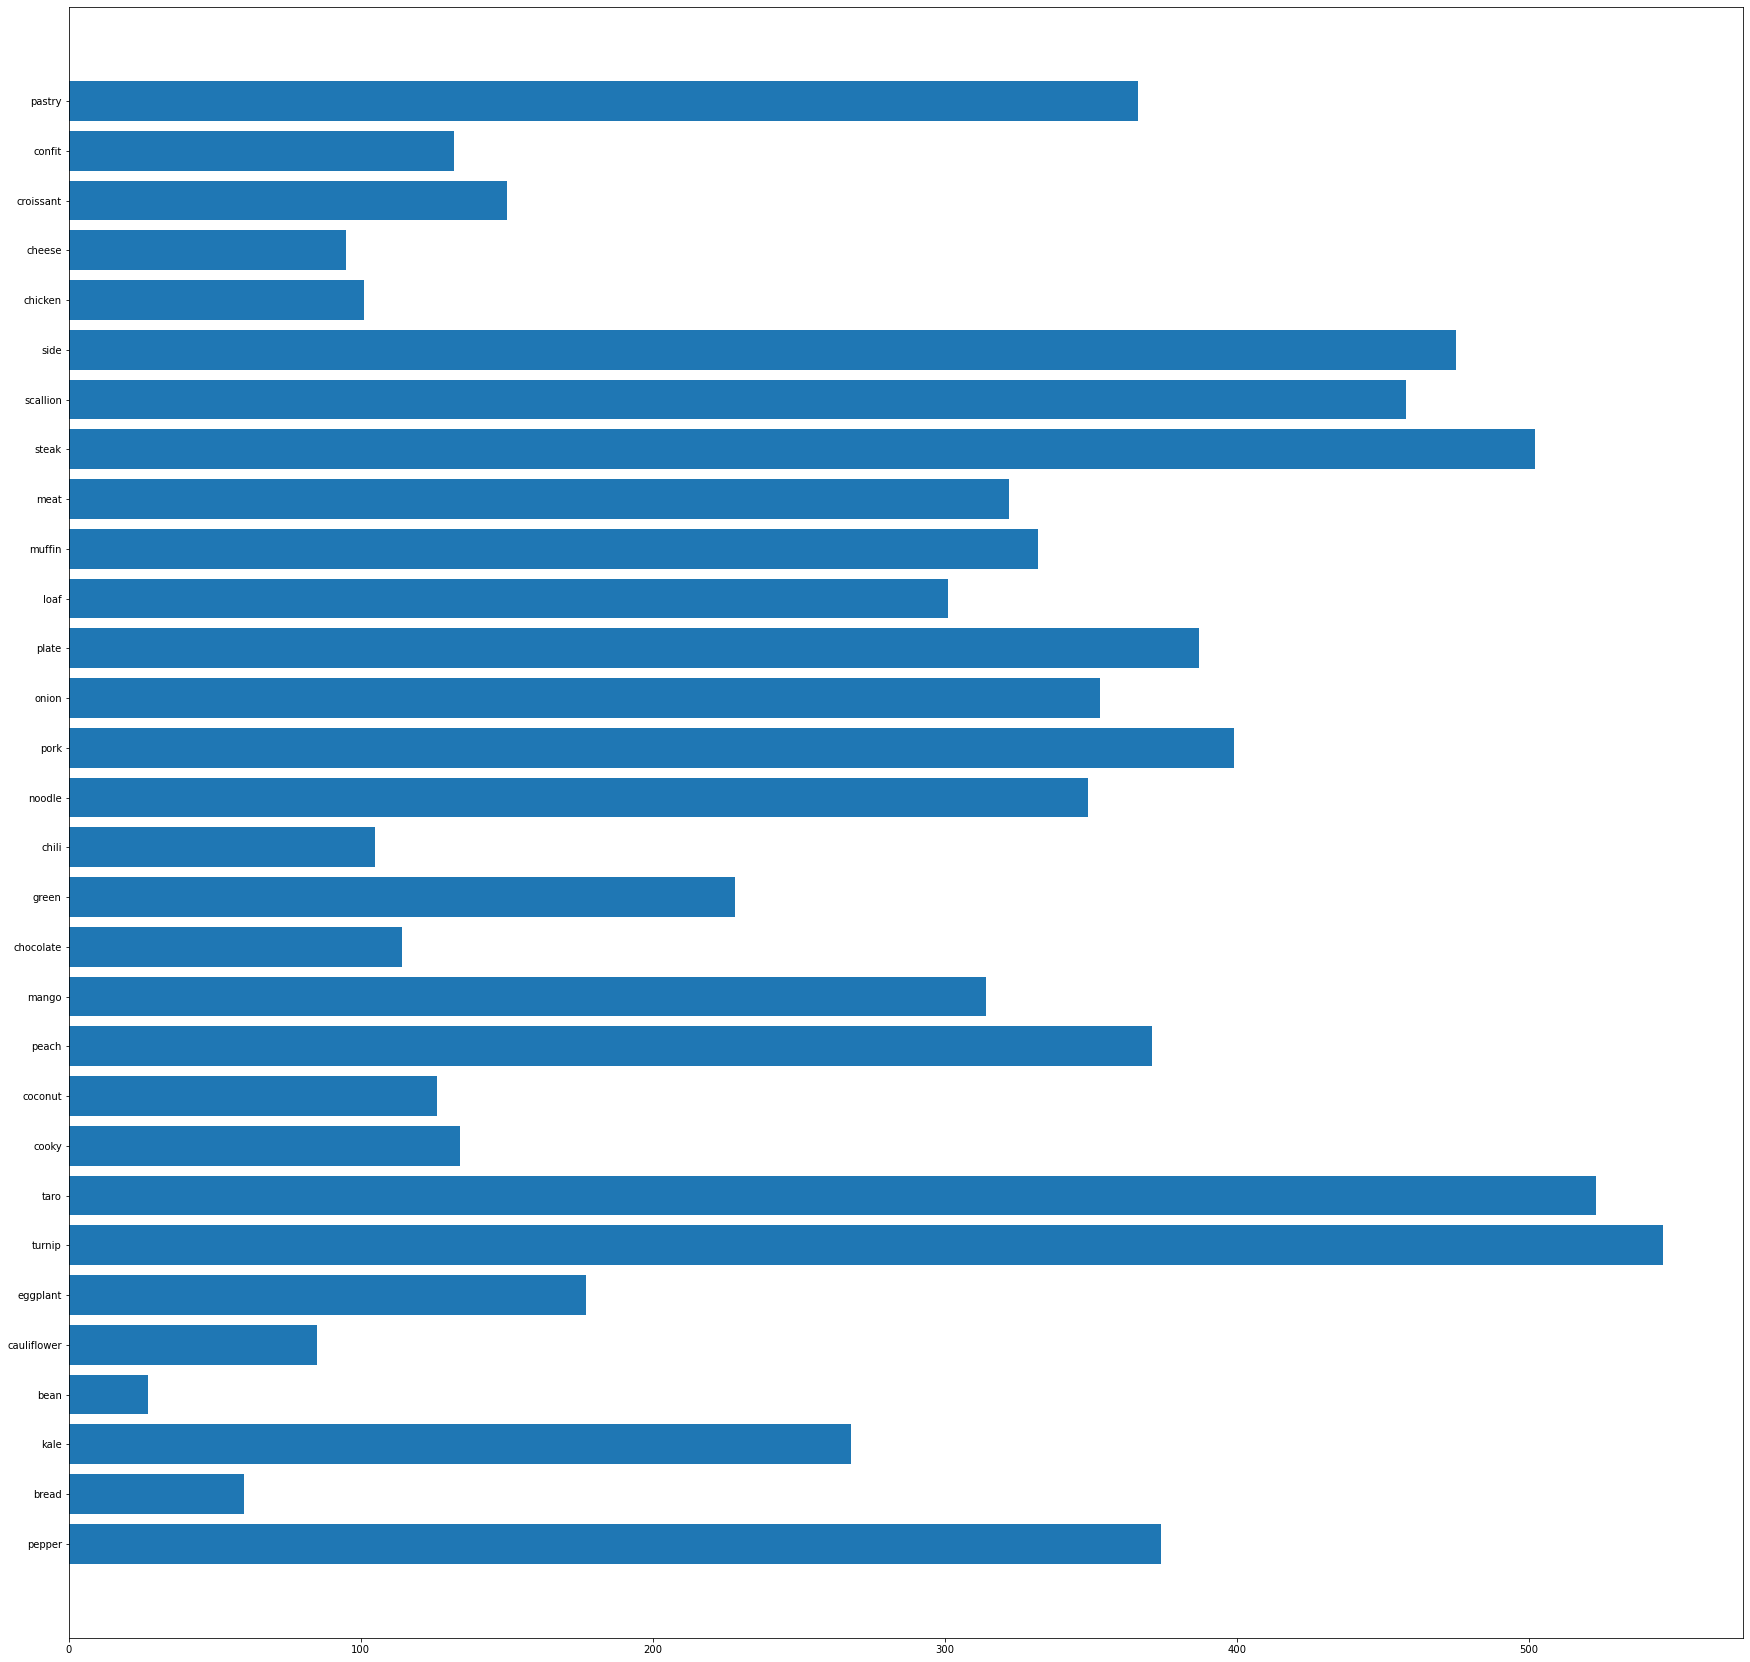

In [33]:
#print(countvectorizer.vocabulary_)
foods= countvectorizer.vocabulary_
names = list(foods.keys())
values = list(foods.values())
fig = plt.figure(figsize=(30, 30))
plt.barh(names[0:30],values[0:30])
plt.show()

# Tf-IDF 

In [34]:
df_nlp.head()

,user_id,text
0,_7bHUi9Uuf5__HHc_Q8guQ,"Wow! Yummy, different, delicious. Our favo..."
1,bcjbaE6dDog4jkNY91ncLQ,Cute interior and owner (?) gave us tour of up...
2,yfFzsLmaWF2d4Sr0UNbBgg,Amazingly amazing wings and homemade bleu chee...
3,1WHRWwQmZOZDAhp2Qyny4g,My experience with Shalimar was nothing but wo...
10,j2wlzrntrbKwyOcOiB3l3w,The hubby and I have been here on multiple occ...


In [89]:
#remove stop words from reviews
df_reviews=df_nlp.groupby('user_id').filter(lambda x: len(x) > 100).reset_index(drop=True)
df_reviews.rename(columns={'text': 'Review'}, errors="raise",inplace=True)
df_reviews['Review']=df_reviews['Review'].str.lower()
df_reviews['Review'] = df_reviews['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#Remove punctuation from reviews
df_reviews['Review']=df_reviews['Review'].apply(remove_punctuations)
#text lemmation
df_reviews['Review'] = df_reviews['Review'].apply(lemmatize_text)
#remove duplicates
df_reviews['Review']=df_reviews['Review'].apply(unique_list)
#reviews parts of speech tagging
df_reviews['Review']=df_reviews['Review'].apply(pos_tagging)
df_reviews.head()

KeyboardInterrupt: 

In [ ]:
df_reviews.head()

In [ ]:
df_reviews['Review']=df_reviews['Review'].apply(convert_str)

In [ ]:
df_reviews.head()

In [ ]:
df_reviews_final=df_reviews.groupby(['user_id'], as_index = False).agg({'Review': ' '.join})
df_reviews_final.head()

In [ ]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())
def remove_nonenglish(L):
    return " ".join(w for w in nltk.wordpunct_tokenize(L) if w.lower() in words or not w.isalpha())
        
df_reviews_final['Review']=df_reviews_final['Review'].apply(remove_nonenglish)

def remove_numbers(L):
    return ' '.join(s for s in L.split() if not any(c.isdigit() for c in s))
df_reviews_final['Review']=df_reviews_final['Review'].apply(remove_numbers)

In [ ]:

reviews_tf_Idf=df_reviews_final['Review']
df_reviews_final.head()
# countvectorizer_reviews=CountVectorizer()
# X_tf_Idf=countvectorizer_reviews.fit_transform(reviews_tf_Idf)
# result_tf_Idf=X_tf_Idf.toarray()
# print(result_tf_Idf)

In [90]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(result)
X_std = preprocessing.StandardScaler().fit_transform(X_scaled)

In [91]:
from scipy.stats import norm
import statistics

In [92]:
X_std[:,5]

array([-0.34778076,  2.18036722, -0.34778076, -0.34778076, -0.34778076,
       -0.34778076,  0.91629323, -0.34778076,  4.70851519, -0.34778076,
       -0.34778076, -0.34778076, -0.34778076,  2.18036722, -0.34778076,
       -0.34778076, -0.34778076, -0.34778076, -0.34778076, -0.34778076,
       -0.34778076,  2.18036722, -0.34778076, -0.34778076, -0.34778076,
       -0.34778076, -0.34778076, -0.34778076, -0.34778076, -0.34778076,
       -0.34778076,  0.91629323, -0.34778076, -0.34778076, -0.34778076,
       -0.34778076, -0.34778076,  0.91629323, -0.34778076,  0.91629323,
       -0.34778076, -0.34778076, -0.34778076,  0.91629323, -0.34778076,
       -0.34778076,  0.91629323,  0.91629323, -0.34778076, -0.34778076,
       -0.34778076, -0.34778076, -0.34778076, -0.34778076, -0.34778076,
       -0.34778076, -0.34778076, -0.34778076, -0.34778076, -0.34778076,
       -0.34778076, -0.34778076,  0.91629323, -0.34778076, -0.34778076,
        0.91629323, -0.34778076, -0.34778076, -0.34778076, -0.34

In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(n_components = 3)
pca.fit(X_std)
data_pca = pca.transform(X_std)

In [95]:
data_pca

array([[ 2.41236774,  2.55794625, -0.36438828],
       [-0.78747001,  2.48959725,  3.08410082],
       [ 0.0359747 , -2.72771997, -2.65459382],
       ...,
       [-3.79775325,  1.28118838,  0.32736564],
       [-7.51524657,  0.26340852,  0.1685055 ],
       [-3.90997233,  0.80509327, -0.29475951]])

<AxesSubplot:>

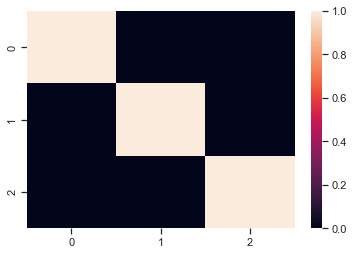

In [96]:
import seaborn as sns
sns.heatmap(pd.DataFrame(data_pca).corr())

In [109]:
data_pca.shape
data_pca_df=pd.DataFrame(data = data_pca, columns = ['pc1','pc2','pc3'])
data_pca_df.insert(0,'user_id',df_food_review['user_id'])
data_pca_df.set_index(['user_id'],inplace=True)
data_pca_df.head()
data_pca_df.index

Index(['-7qUbOVWJp2NT3f_TNuIBA', '-B-QEUESGWHPE_889WJaeg',
       '-FxsSuwDbIII7yo5BjHpiA', '-G7Zkl1wIWBBmD0KRy_sCw',
       '-GowNe73gDZs9MfS3ugJDQ', '-THLGnsYKu3yQAsy_tt1fw',
       '-TLXQfY2lZ6DVWQj4BosxQ', '-V7frksbFjKQYVhrPnnlPw',
       '-ZHlPAvlVdgtiu6DiCq7Yg', '-dgC1iRp_JqBTmn5d1wRhg',
       ...
       'zQTEbn5nWGPypxOf2uRPmg', 'zShZM_7gg8cQ8RqNteEPgQ',
       'zTwwciNRMedBvUS3-_8h6g', 'zUk_Ww2q1At1QSyRbUjIGQ',
       'zWC1npRbmWO2bZRt2fYgfw', 'zYFGMy1_thjMnvQLX6JNBw',
       'zfD3xhVNkGJs-AOOSslqtQ', 'zu-e06_BM_TdkAZEKMrIww',
       'zv7tpu7xeaNyAeFG03d2CA', 'zyvxtbh5eJ86bVgk52Yflg'],
      dtype='object', name='user_id', length=985)

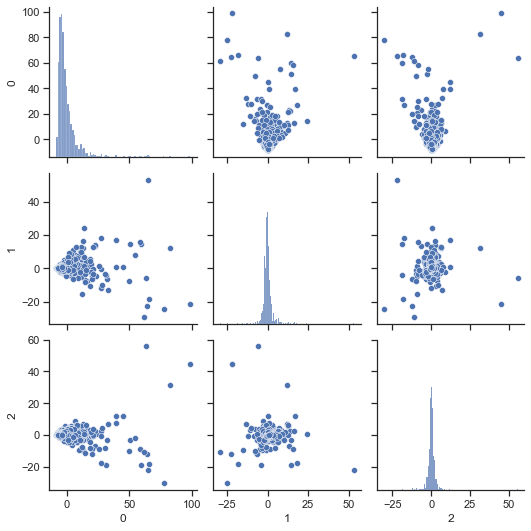

In [102]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(pd.DataFrame(data_pca))

In [110]:
# most of the data is distributed into 10-15 clusters 
def createClusters(cluster_size):
    result = pd.DataFrame(data_pca_df.index)
    user_kmeans_model = KMeans(n_clusters=cluster_size, n_init = 1).fit(data_pca_df)
    result['label'] = pd.Series(user_kmeans_model.labels_, index= result.index)
    return result
labeld_data = createClusters(15)
cluster_dist = labeld_data.groupby(['label']).count()
cluster_dist


,user_id
label,
0,286
1,7
2,93
3,1
4,3
5,4
6,14
7,1
8,39


In [113]:
labeld_data

,user_id,label
0,-7qUbOVWJp2NT3f_TNuIBA,9
1,-B-QEUESGWHPE_889WJaeg,9
2,-FxsSuwDbIII7yo5BjHpiA,10
3,-G7Zkl1wIWBBmD0KRy_sCw,12
4,-GowNe73gDZs9MfS3ugJDQ,10
...,...,...
980,zYFGMy1_thjMnvQLX6JNBw,12
981,zfD3xhVNkGJs-AOOSslqtQ,13
982,zu-e06_BM_TdkAZEKMrIww,0
983,zv7tpu7xeaNyAeFG03d2CA,13


In [121]:
df_vectorizer.insert(0,'user_id',df_food_review['user_id'])
df_vectorizer.head()
#df_vectorizer[df_vectorizer['user_id']=='-7qUbOVWJp2NT3f_TNuIBA']

,user_id,ackee,aguacate,akee,albacore,ananas,anchovy,anjou,annon,apple,...,wienerwurst,windfall,winkle,wintergreen,wonton,yam,yoghurt,yogurt,ziti,zucchini
0,-7qUbOVWJp2NT3f_TNuIBA,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,2,0,2
1,-B-QEUESGWHPE_889WJaeg,0,0,0,0,0,2,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,-FxsSuwDbIII7yo5BjHpiA,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,1,0,1,0,0
3,-G7Zkl1wIWBBmD0KRy_sCw,0,0,0,0,0,0,0,0,40,...,0,0,0,0,13,3,0,5,0,3
4,-GowNe73gDZs9MfS3ugJDQ,0,0,0,0,0,0,0,0,4,...,0,0,0,0,3,0,0,1,0,0


In [122]:
df_food_review['user_id']

0      -7qUbOVWJp2NT3f_TNuIBA
1      -B-QEUESGWHPE_889WJaeg
2      -FxsSuwDbIII7yo5BjHpiA
3      -G7Zkl1wIWBBmD0KRy_sCw
4      -GowNe73gDZs9MfS3ugJDQ
                ...          
980    zYFGMy1_thjMnvQLX6JNBw
981    zfD3xhVNkGJs-AOOSslqtQ
982    zu-e06_BM_TdkAZEKMrIww
983    zv7tpu7xeaNyAeFG03d2CA
984    zyvxtbh5eJ86bVgk52Yflg
Name: user_id, Length: 985, dtype: object

In [123]:
def common_interests(user_1, user_2): 
    og_df = df_vectorizer[df_vectorizer['user_id'].isin([user_1, user_2])]
    interests = (og_df!=0).all()
    interests_lst = list(interests.index[interests])
    interest_df = og_df[interests_lst]
    common_counts = interest_df.sum().to_dict()
    common_counts.pop("user_id", None)
    #print(interest_df)
    sorted_common = sorted(common_counts.items(), key=lambda x:x[1], reverse = True)
    common = [tup[0] for tup in sorted_common][0:3]
    return(common)

In [133]:
def friend_recommender(user_id):
    cluster = int(labeld_data[labeld_data['user_id'] == user_id]['label'])
    other_users = labeld_data[labeld_data['label'] == cluster]['user_id']
  
    dists = {}
    current_user = data_pca_df.loc[user_id].to_numpy()
    for user in other_users:
        other_user = data_pca_df.loc[user].to_numpy()
        dist = np.linalg.norm(current_user - other_user)
        dists[user] = dist
    
    sorted_friends = sorted(dists.items(), key=lambda x:x[1])[1:6]
    close_friends = [tup[0] for tup in sorted_friends]
    common = []
    
    for friend in close_friends: 
        common.append(common_interests(user_id, friend))
    
    final_dict = {'Recommended User': close_friends, 'Food Interests': common}
    final_df = pd.DataFrame(final_dict)
    return(final_df)


In [134]:
friend_recommender('zyvxtbh5eJ86bVgk52Yflg')

,Recommended User,Food Interests
0,FdIiFCp5vPcFyWGn6_qf-Q,"[cheese, side, chicken]"
1,SyABteXA7u_-GA2nKLJ-XQ,"[cheese, chicken, side]"
2,wABHp4fGUC-0acRKhmQO2A,"[cheese, chicken, side]"
3,F8aIrswXr4zFwtPH36w1sA,"[cheese, side, date]"
4,ylE_w4QR7JCz9cr9ub9l3A,"[side, cheese, bread]"


In [135]:
friend_recommender('Va1VeFo3so8d444ohkSGjg')

,Recommended User,Food Interests
0,hKBQ-PFlcB-t5FK3HUxoyQ,"[side, chicken, pork]"
1,e5hwGgorUG6KX-eSO_UCcA,"[side, chicken, cheese]"
2,L8Euta_K7ZDA5iwBHDyhbA,"[side, chicken, pork]"
3,ET3TgSSQ3shm2mj5vZ8IVQ,"[chicken, side, cheese]"
4,2RFyJnbJ5AHT9hQp_tMeYw,"[side, cheese, chicken]"


'ojyWQJtQ_ESVDvqL-69tLA'

In [137]:
friend_recommender('ojyWQJtQ_ESVDvqL-69tLA')

,Recommended User,Food Interests
0,eg0cwrodeKGLeLIDTSCXoA,"[cheese, side, veggie]"
1,rfFCDTjJMN7ChYcCKkcHag,"[veggie, cheese, bread]"
2,Pk-dihlvXRaVfE65ghVOLA,"[veggie, chocolate, potato]"
3,2LfozZiejXfQHcS52-Fv5w,"[veggie, veg, cheese]"
4,yU4MW48QQ1eAdOkztAVf3g,"[side, cheese, veggie]"


In [147]:
df_food_review['user_id'][900]

'vDACtEdgJP3mS-U0_NA0Pw'

In [154]:
friend_recommender(df_food_review['user_id'][398])

,Recommended User,Food Interests
0,6XyQ3fGGMCVS1W7ma9chng,"[cheese, chicken, side]"
1,8HkU-mqIe-9KAhhIjBiaXQ,"[cheese, side, bread]"
2,2-emzYMEFFSOcEBF6B-0NQ,"[cheese, crab, shrimp]"
3,cPT-E02ZVvzevldYI-vrAg,"[cheese, side, crab]"
4,bhAB5wo9iLsaExSw4apR4g,"[cheese, side, crab]"
